In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer


In [13]:
tips = sns.load_dataset('tips')

print("Sample of Tips Dataset:")
print(tips.head())


Sample of Tips Dataset:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [14]:
print("Missing values in each column:")
print(tips.isnull().sum())


Missing values in each column:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [15]:
df = tips[['total_bill', 'tip', 'size', 'sex', 'smoker', 'time']].copy()

print("Selected columns:")
print(df.head())


Selected columns:
   total_bill   tip  size     sex smoker    time
0       16.99  1.01     2  Female     No  Dinner
1       10.34  1.66     3    Male     No  Dinner
2       21.01  3.50     3    Male     No  Dinner
3       23.68  3.31     2    Male     No  Dinner
4       24.59  3.61     4  Female     No  Dinner


In [16]:
num_cols = ['total_bill', 'tip', 'size']

imputer_num = SimpleImputer(strategy='mean')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

print("After handling missing numerical values:")
print(df.head())


After handling missing numerical values:
   total_bill   tip  size     sex smoker    time
0       16.99  1.01   2.0  Female     No  Dinner
1       10.34  1.66   3.0    Male     No  Dinner
2       21.01  3.50   3.0    Male     No  Dinner
3       23.68  3.31   2.0    Male     No  Dinner
4       24.59  3.61   4.0  Female     No  Dinner


In [17]:
cat_cols = ['sex', 'smoker', 'time']

imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

print("After handling missing categorical values:")
print(df.head())


After handling missing categorical values:
   total_bill   tip  size     sex smoker    time
0       16.99  1.01   2.0  Female     No  Dinner
1       10.34  1.66   3.0    Male     No  Dinner
2       21.01  3.50   3.0    Male     No  Dinner
3       23.68  3.31   2.0    Male     No  Dinner
4       24.59  3.61   4.0  Female     No  Dinner


In [18]:
encoder_sex = LabelEncoder()
encoder_smoker = LabelEncoder()
encoder_time = LabelEncoder()

df['sex'] = encoder_sex.fit_transform(df['sex'])
df['smoker'] = encoder_smoker.fit_transform(df['smoker'])
df['time'] = encoder_time.fit_transform(df['time'])

print("After encoding categorical values:")
print(df.head())


After encoding categorical values:
   total_bill   tip  size  sex  smoker  time
0       16.99  1.01   2.0    0       0     0
1       10.34  1.66   3.0    1       0     0
2       21.01  3.50   3.0    1       0     0
3       23.68  3.31   2.0    1       0     0
4       24.59  3.61   4.0    0       0     0


In [19]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("After feature scaling:")
print(df.head())


After feature scaling:
   total_bill       tip      size  sex  smoker  time
0   -0.314711 -1.439947 -0.600193    0       0     0
1   -1.063235 -0.969205  0.453383    1       0     0
2    0.137780  0.363356  0.453383    1       0     0
3    0.438315  0.225754 -0.600193    1       0     0
4    0.540745  0.443020  1.506958    0       0     0


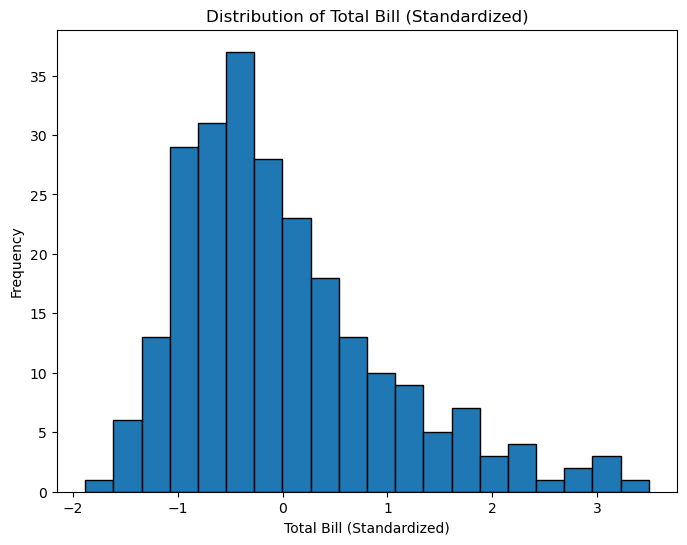

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(df['total_bill'], bins=20, edgecolor='black')
plt.title('Distribution of Total Bill (Standardized)')
plt.xlabel('Total Bill (Standardized)')
plt.ylabel('Frequency')
plt.show()


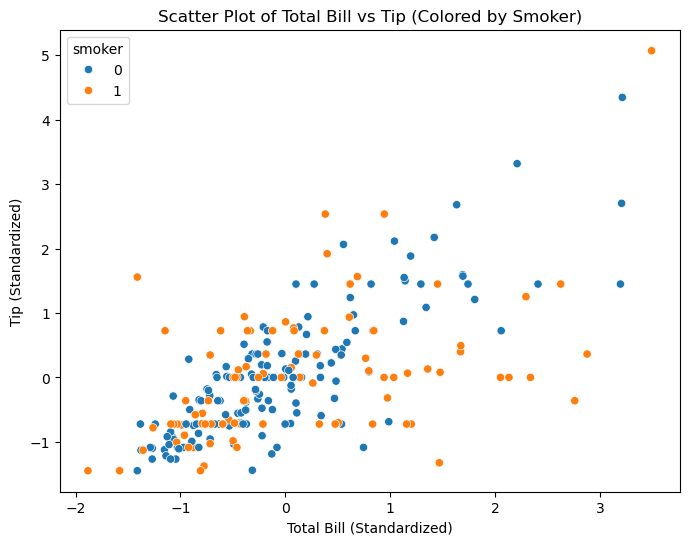

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', hue='smoker', data=df)
plt.title('Scatter Plot of Total Bill vs Tip (Colored by Smoker)')
plt.xlabel('Total Bill (Standardized)')
plt.ylabel('Tip (Standardized)')
plt.show()


Correlation Matrix:
            total_bill       tip      size       sex    smoker      time
total_bill    1.000000  0.675734  0.598315  0.144877  0.085721 -0.183118
tip           0.675734  1.000000  0.489299  0.088862  0.005929 -0.121629
size          0.598315  0.489299  1.000000  0.086195 -0.133178 -0.103411
sex           0.144877  0.088862  0.086195  1.000000  0.002816 -0.205231
smoker        0.085721  0.005929 -0.133178  0.002816  1.000000 -0.054921
time         -0.183118 -0.121629 -0.103411 -0.205231 -0.054921  1.000000


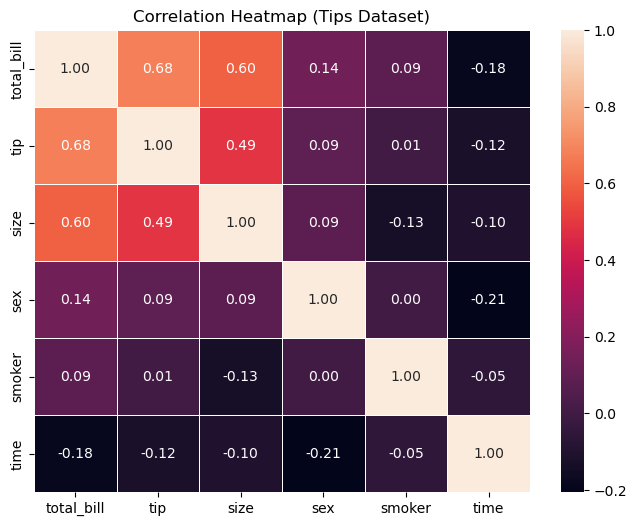

In [22]:
correlation_matrix = df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Tips Dataset)')
plt.show()
